<a href="https://colab.research.google.com/github/satheesh3180/load_breast_cancer-/blob/main/CNN_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 4 files belonging to 2 classes.
Found 2 files belonging to 2 classes.


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_22 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_11 (Lambda)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 1.0000 - loss: 0.6246 - val_accuracy: 0.0000e+00 - val_loss: 1.0797
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.4177 - val_accuracy: 0.0000e+00 - val_loss: 1.0934
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.7293 - val_accuracy: 0.0000e+00 - val_loss: 1.1064
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.4992 - val_accuracy: 0.0000e+00 - val_loss: 1.1183
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.4485 - val_accuracy: 0.0000e+00 - val_loss: 1.1298
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.4496 - val_accuracy: 0.0000e+00 - val_loss: 1.1416
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.5357 - val_accuracy: 0.0000e+00 - val_loss: 1.1539
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.5133 - val_accuracy: 0.0000e+00 -

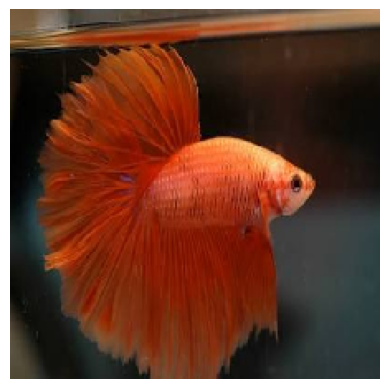

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# =====================================================
# SETTINGS
# =====================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
EPOCHS = 10

# 👉 Choose model: "vgg" OR "resnet"
MODEL_TYPE = "resnet"   # change to "vgg" if needed

# =====================================================
# LOAD DATA
# =====================================================
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/dataset/train", # Corrected path to lowercase 'dataset'
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/dataset/test",  # Corrected path to lowercase 'dataset'
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

class_names = train_data.class_names
#print("Classes:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(AUTOTUNE)
test_data = test_data.cache().prefetch(AUTOTUNE)

# =====================================================
# DATA AUGMENTATION
# =====================================================
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# =====================================================
# BASE MODEL SELECTION
# =====================================================
if MODEL_TYPE == "vgg":
    base_model = tf.keras.applications.VGG16(include_top=False,weights="imagenet",input_shape=(224,224,3))
    preprocess = tf.keras.applications.vgg16.preprocess_input
elif MODEL_TYPE == "resnet":
    base_model = tf.keras.applications.ResNet50(include_top=False,weights="imagenet",input_shape=(224,224,3))
    preprocess = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False

# =====================================================
# BUILD MODEL
# =====================================================
model = models.Sequential([data_aug,layers.Lambda(preprocess),base_model,layers.GlobalAveragePooling2D(),

# Regularized dense layer
    layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.001)),layers.BatchNormalization(),layers.Dropout(0.5),

# Output activation
    layers.Dense(1, activation="sigmoid")
])

model.summary()

# =====================================================
# COMPILE
# =====================================================
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

# =====================================================
# TRAIN
# =====================================================
history = model.fit(train_data,validation_data=test_data,epochs=EPOCHS)

# =====================================================
# EVALUATE
# =====================================================
loss, acc = model.evaluate(test_data)
print(f"\n✅ Final Accuracy: {acc*100:.2f}%")

# =====================================================
# PREDICT SINGLE IMAGE
# =====================================================
img_path = "/content/Dataset/test/fish/diff.fish.jfif"  # Corrected path based on available files and syntax error

img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0][0]

print("\nPrediction Probability:", round(pred,3))
print("Prediction:", "fish 🐶" if pred >= 0.5 else "frog 🐱")

plt.imshow(img)
plt.axis("off")
plt.show()